In [1]:
import pandas as pd

In [77]:
dfs = []
for bnpairs in range(1, 11):
    df = pd.read_pickle('/mnt/c/Users/guido/workcopies/apdft/prototyping/mrcc/c20-data/predictions/bnpairs-%d.pkl' % bnpairs)
    df['bncount'] = bnpairs
    df['atoms'] =     -23.624308208720*bnpairs + -37.714812342283*(20-2*bnpairs) + -52.831420359950 * bnpairs
    #-23.624308208720, '6': -37.714812342283, '7': -52.831420359950
    dfs.append(df)

In [78]:
import matplotlib.pyplot as plt

In [79]:
df = pd.concat(dfs)

In [80]:
s = df.groupby('bncount').count()['target']

<BarContainer object of 10 artists>

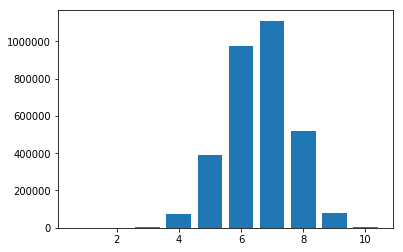

In [81]:
plt.bar(range(1, 11), s.values)

In [82]:
import numpy as np

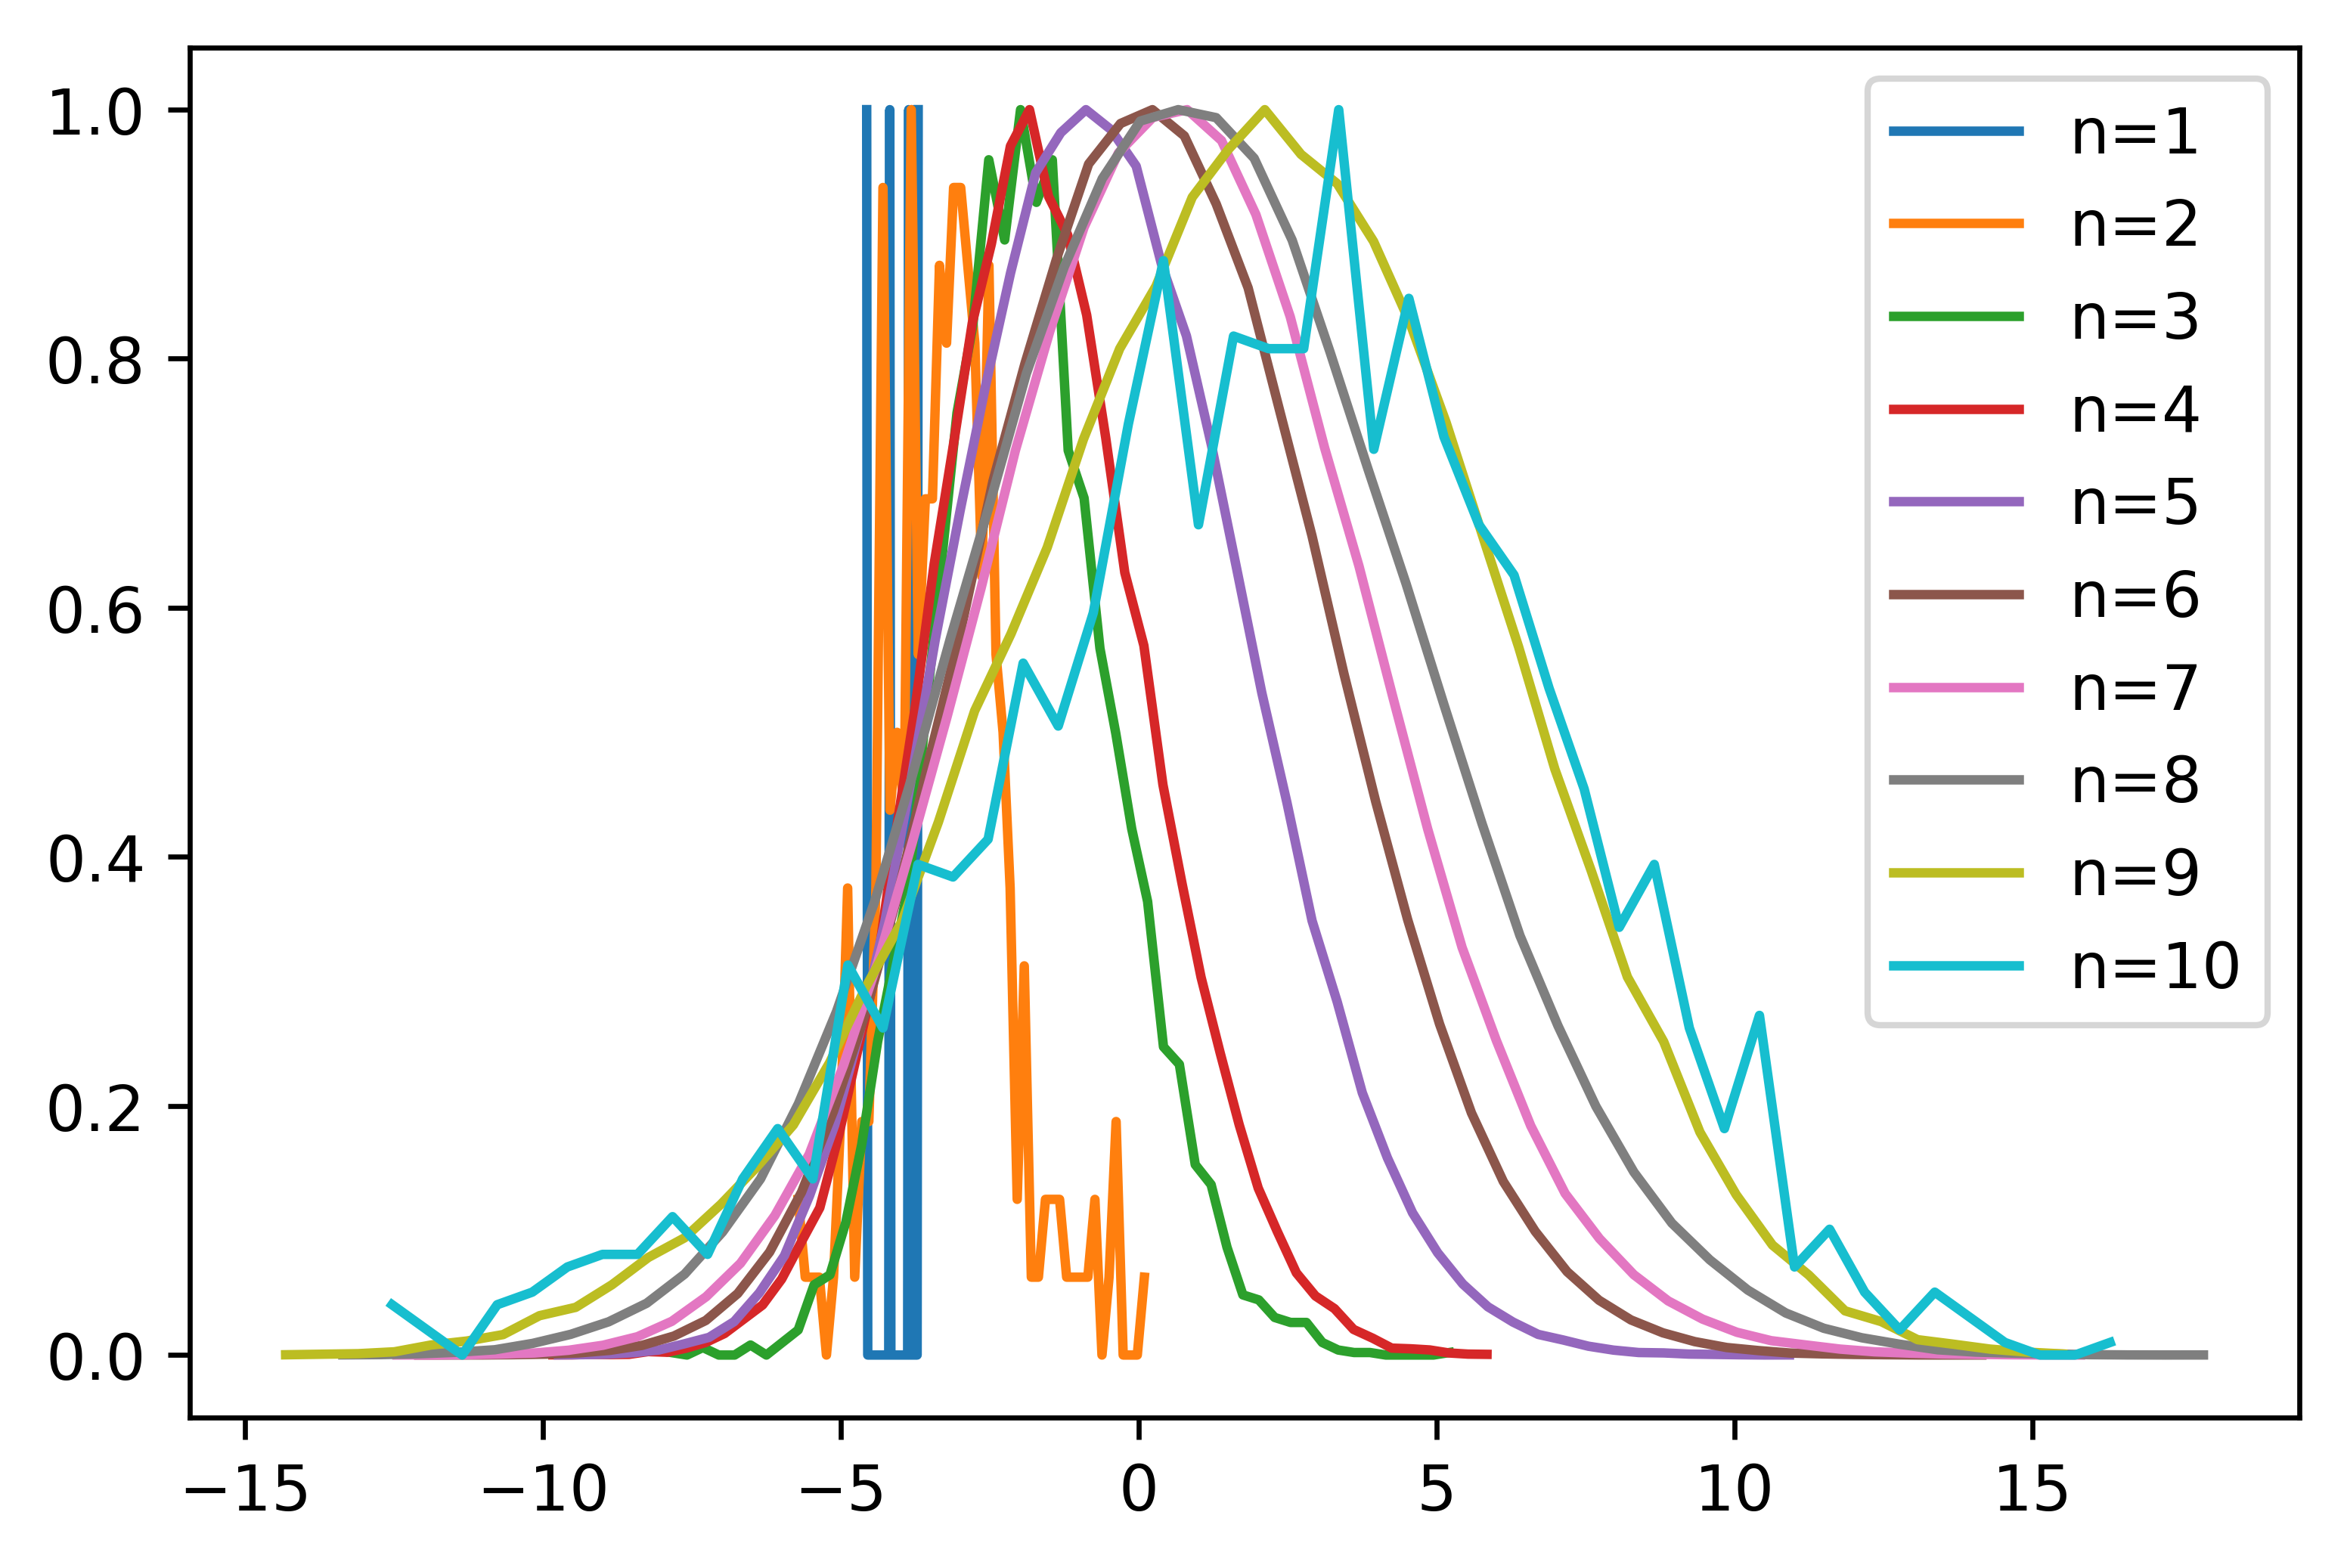

In [83]:
f, axs = plt.subplots(1, 1, sharex=True, dpi=600)

for name, group in df.groupby('bncount'):
    hist, bins = np.histogram(group.order2.values - group.atoms.values + group.order0 , bins=50)
    bins = (bins[1:] + bins[:-1])/2
    hist = hist/np.max(hist)
    plt.plot(bins, hist, label='n=%d' % name)
    #axs.hist(, bins=100, histtype='step', density=False)
plt.legend()

In [66]:
comb = pd.read_csv('c20-combined.csv')

(-4, -2.5)

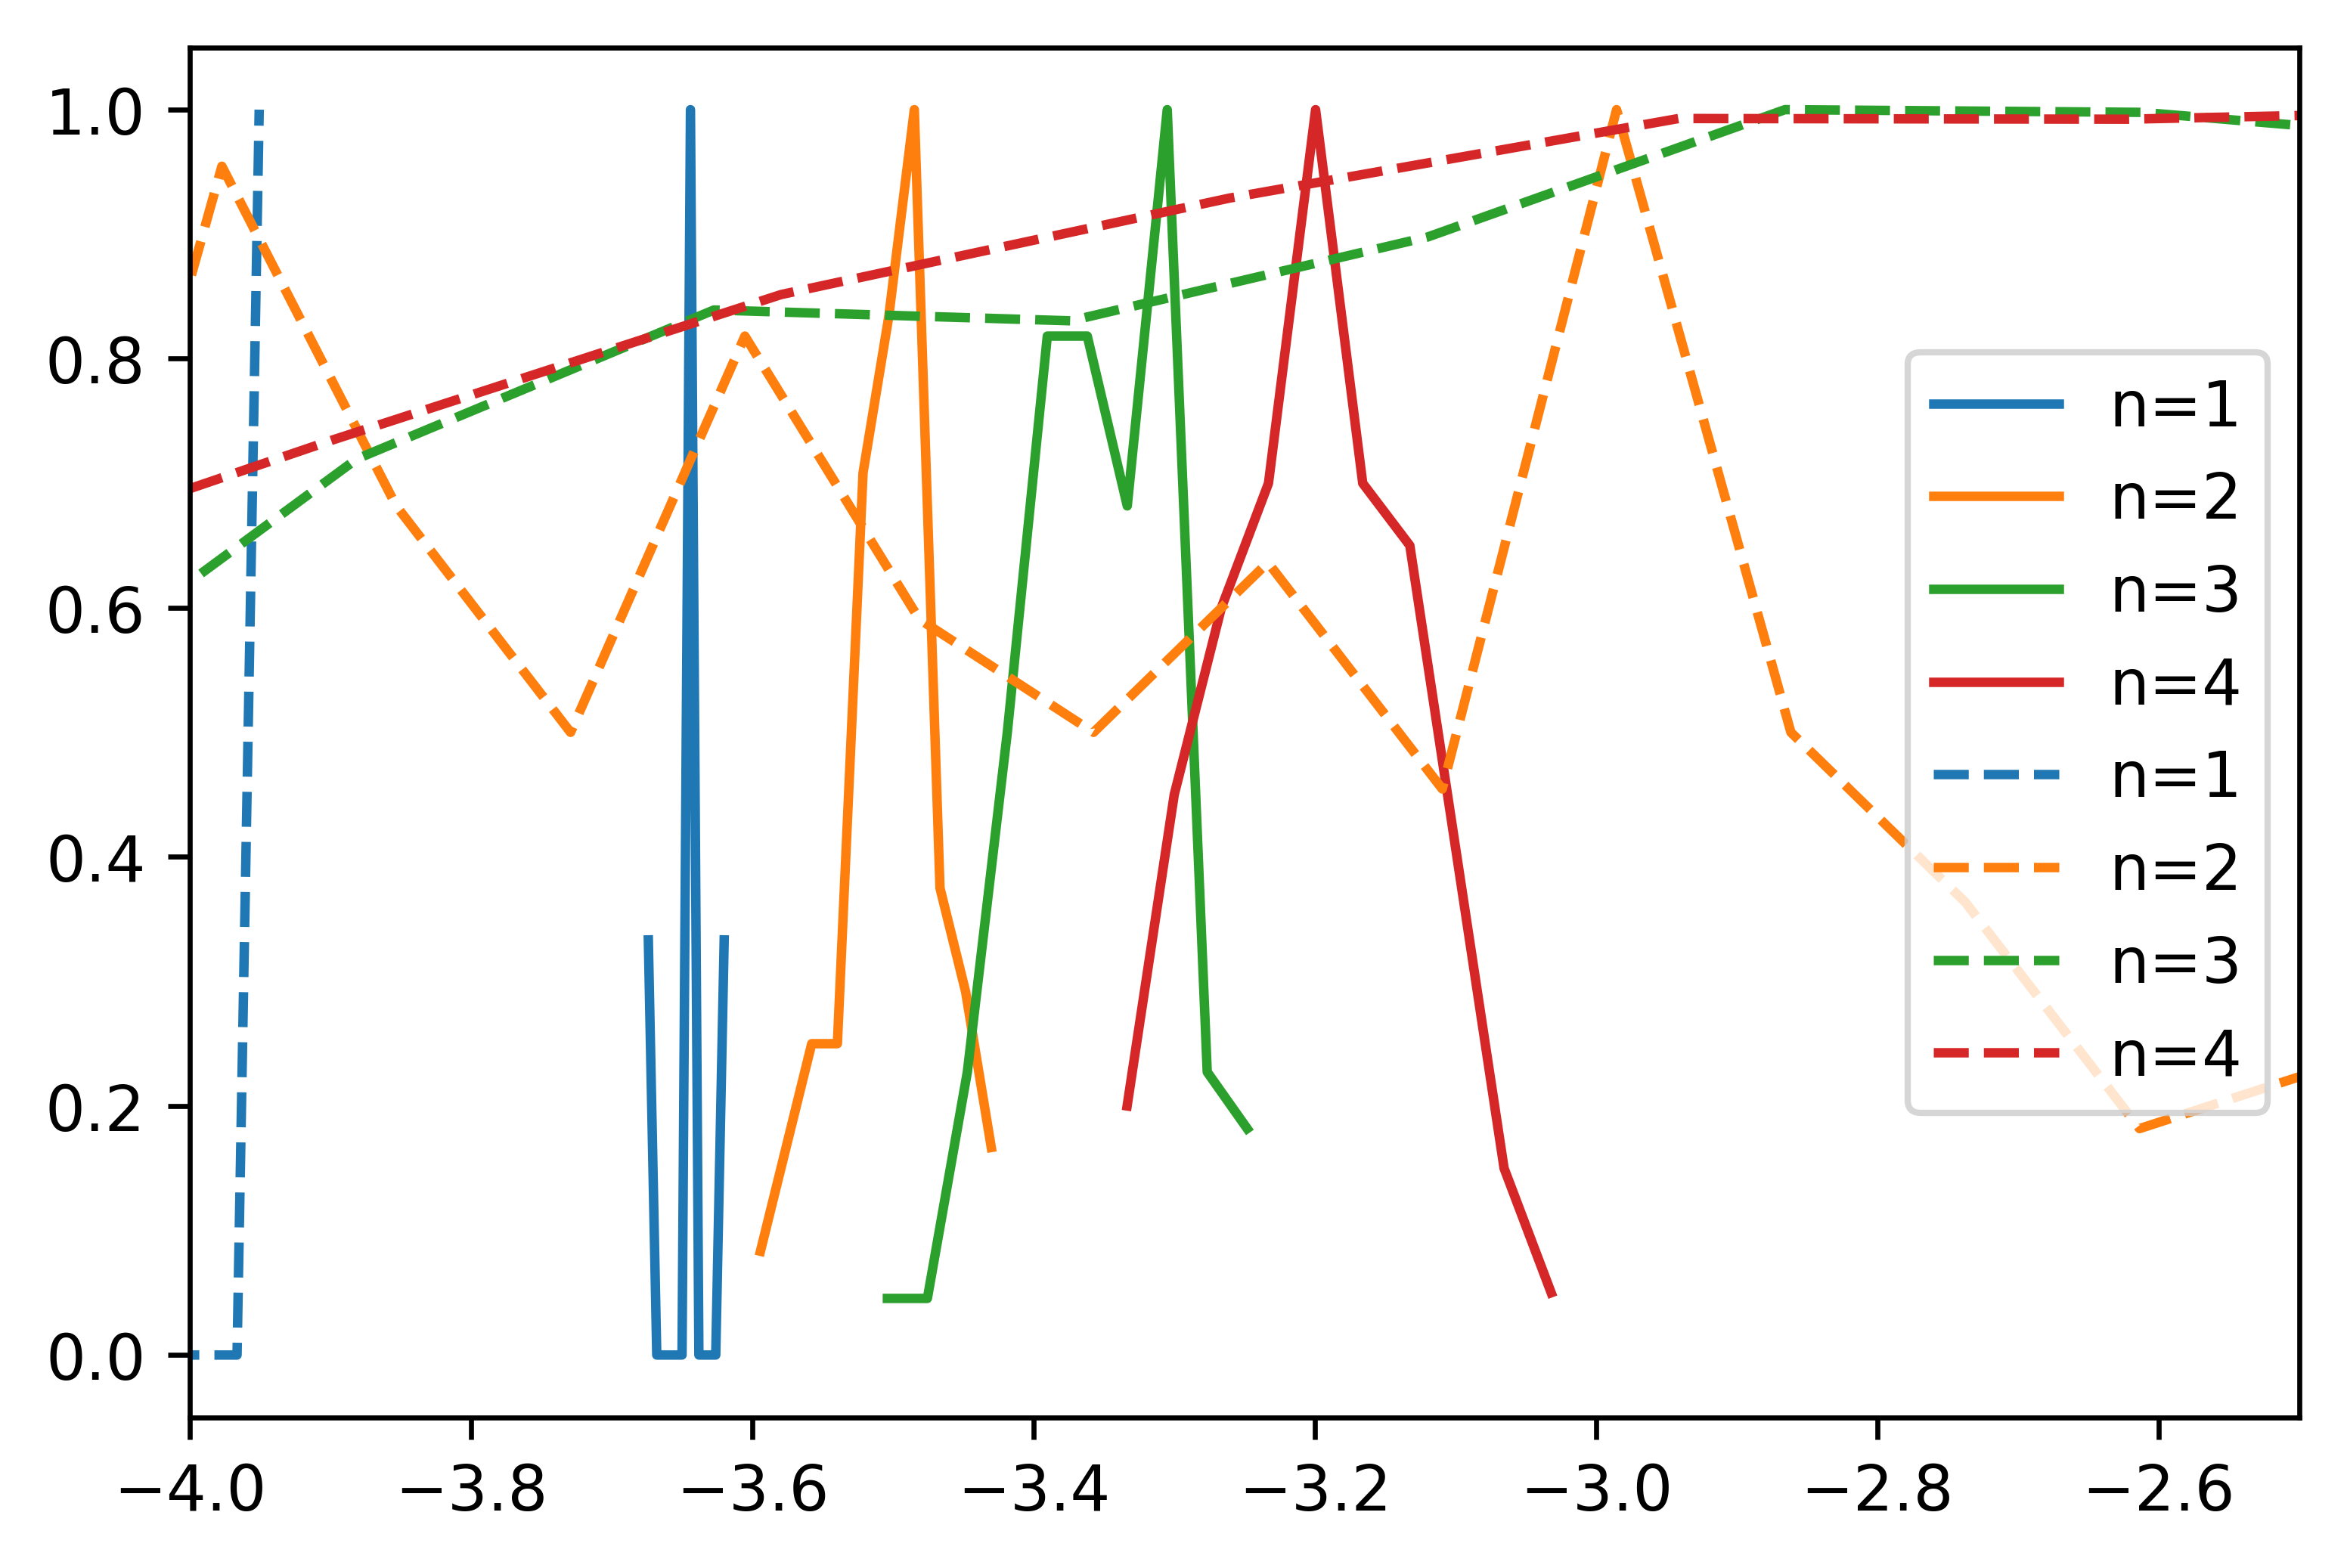

In [84]:
f, axs = plt.subplots(1, 1, sharex=True, dpi=600)

s = comb.query("bnpairs < 5")
for name, group in s.groupby('bnpairs'):
    hist, bins = np.histogram(group.CCSD_A, bins=10)
    bins = (bins[1:] + bins[:-1])/2
    hist = hist/np.max(hist)
    plt.plot(bins, hist, label='n=%d' % name, color='C%d' % (name-1))
    #axs.hist(, bins=100, histtype='step', density=False)
s = df.query("bncount < 5")
for name, group in s.groupby('bncount'):
    hist, bins = np.histogram(group.order2.values - group.atoms.values + group.order0 +group.deltaNN, bins=50)
    bins = (bins[1:] + bins[:-1])/2
    hist = hist/np.max(hist)
    plt.plot(bins, hist, '--', label='n=%d' % name, color='C%d' % (name-1))
    #axs.hist(, bins=100, histtype='step', density=False)
    
    
plt.legend()

plt.xlim(-4, -2.5)

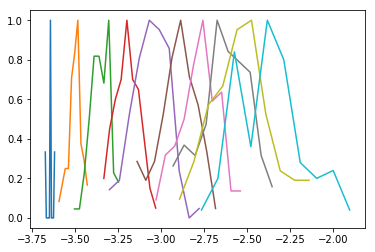

In [85]:

for name, group in comb.groupby('bnpairs'):
    hist, bins = np.histogram(group.CCSD_A, bins=10)
    bins = (bins[1:] + bins[:-1])/2
    hist = hist/np.max(hist)
    plt.plot(bins, hist, label='n=%d' % name, color='C%d' % (name-1))
    #axs.hist(, bins=100, histtype='step', density=False)